<a href="https://colab.research.google.com/github/shunnyK/AI/blob/main/winequality_whiteDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4454 - loss: 1.4964 - val_accuracy: 0.5255 - val_loss: 1.2106
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5443 - loss: 1.1310 - val_accuracy: 0.5523 - val_loss: 1.1429
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5612 - loss: 1.0726 - val_accuracy: 0.5536 - val_loss: 1.1181
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5899 - loss: 1.0057 - val_accuracy: 0.5408 - val_loss: 1.1081
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5691 - loss: 1.0339 - val_accuracy: 0.5625 - val_loss: 1.1062
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5915 - loss: 0.9764 - val_accuracy: 0.5472 - val_loss: 1.0882
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5814 - loss: 0.9885 - val_accuracy: 0.5446 - val_loss: 1.0890
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5935 - loss: 0.9509 - val_accuracy: 0.5446 - val_

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


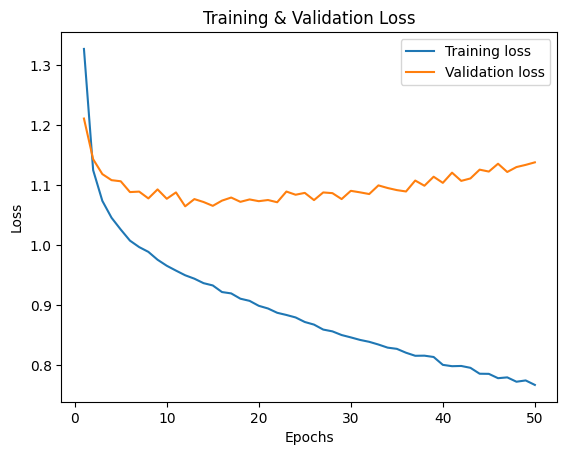

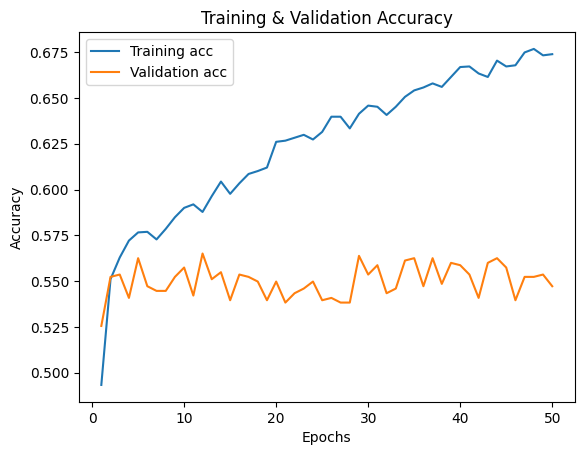

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# ===== 1. 데이터 불러오기 (3행부터, 헤더 수동 지정) =====
path = "/content/drive/MyDrive/winequality-white.csv"  # 본인 경로
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar',
        'chlorides','free sulfur dioxide','total sulfur dioxide',
        'density','pH','sulphates','alcohol','quality']

# 파일 상단 설명/빈줄 1줄을 건너뛰고, header=None + names 지정
df = pd.read_csv(path, sep=';', skiprows=1, header=None, names=cols)

# ===== 2. 타깃 라벨 인코딩 (3~9 → 0~6) =====
le = LabelEncoder()
y_int = le.fit_transform(df['quality'])  # 정수 라벨

# ===== 3. 입력/타깃 분리 =====
X = df.drop(columns=['quality']).values  # (n_samples, 11)
y = y_int                                 # (n_samples,)

# ===== 4. 학습/테스트 분할 (라벨 비율 유지) =====
X_train, X_test, y_train_int, y_test_int = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 5. 스케일링 =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ===== 6. 원-핫 인코딩 =====
num_classes = len(np.unique(y))
y_train = to_categorical(y_train_int, num_classes=num_classes)
y_test  = to_categorical(y_test_int,  num_classes=num_classes)

# ===== 7. 모델 정의 =====
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ===== 8. 학습 =====
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # train의 20%를 검증으로 사용
    epochs=50,
    batch_size=16,
    verbose=1
)

# ===== 9. 예측/평가 =====
y_pred_proba = model.predict(X_test)
y_pred_class = np.argmax(y_pred_proba, axis=1)
y_test_class = y_test_int  # 원래 정수 라벨

print("\n=== Classification Report (정수 라벨 기준) ===")
print(classification_report(y_test_class, y_pred_class, target_names=le.classes_.astype(str)))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_class, y_pred_class))

# ===== 10. 학습 곡선 시각화 =====
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')